In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os, cv2
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_files
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications import *

train_path = './train'
validate_path = './val'
test_path = './test'

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary

In [2]:

dim = 299
epochs = 50
learning_rate = 0.0001
batch_size = 16
# Train/validation split
train_number = 3790
validation_number = 480

In [3]:
def create_generator(data_path, dim, batch_size):
    new_datagen = ImageDataGenerator()  
    new_generator = new_datagen.flow_from_directory(
                                    data_path,
                                    target_size=(dim, dim),
                                    batch_size=batch_size,
                                    class_mode=None, 
                                    shuffle=False)
    
   
    return new_generator


In [4]:
#Get Xception bottleneck

In [5]:
def get_bottleneck_xception(train_path, validate_path, test_path, dim, batch_size):
    train_generator = create_generator(train_path, dim, batch_size)
    validate_generator = create_generator(validate_path, dim, batch_size)
    test_generator = create_generator(test_path, dim, batch_size)

    base_model = Xception(input_shape=(dim, dim, 3), include_top=False, weights='imagenet', pooling='avg')
    x = base_model.output
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)    
    predictions = Dense(12, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
    model.load_weights(os.path.join('', 'weights.h5'))
    model.layers.pop()
    model.layers.pop()
    
    x_train = model.predict_generator(train_generator,verbose = 1,steps = 237)
    y_train = train_generator.classes
    
    x_val = model.predict_generator(validate_generator, verbose=1, steps = 30)
    y_val = validate_generator.classes
    
    x_test = model.predict_generator(test_generator, verbose=1, steps = 30)
    y_test = test_generator.classes

    return x_train, x_val, x_test, y_train, y_val, y_test 

In [6]:
x_xception_train, x_xception_val, x_exception_test, y_xception_train, y_xception_val, y_xception_test = \
    get_bottleneck_xception(train_path, validate_path, test_path,dim, batch_size)

Found 3790 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
30/30 [==============================] - 13s    


In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_xception_train, y_xception_train)
lr_pred = lr.predict(x_xception_val)
accuracy_score(y_xception_val, lr_pred)

0.9666666666666667

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", class_weight="balanced")

In [10]:
svc.fit(x_xception_train, y_xception_train)
svc_pred = svc.predict(x_xception_val)
accuracy_score(y_xception_val, svc_pred)

0.96875

In [11]:
svc_pred = svc.predict(x_exception_test)

In [12]:
accuracy_score(y_xception_test, svc_pred)

0.9645833333333333

In [80]:
 import xgboost as xgb

In [81]:
xb = xgb.XGBClassifier()

xb.fit(x_xception_train, y_xception_train)

print('fitting done !!!')


fitting done !!!


In [82]:
xb.score(x_xception_val,y_xception_val)


0.96458333333333335

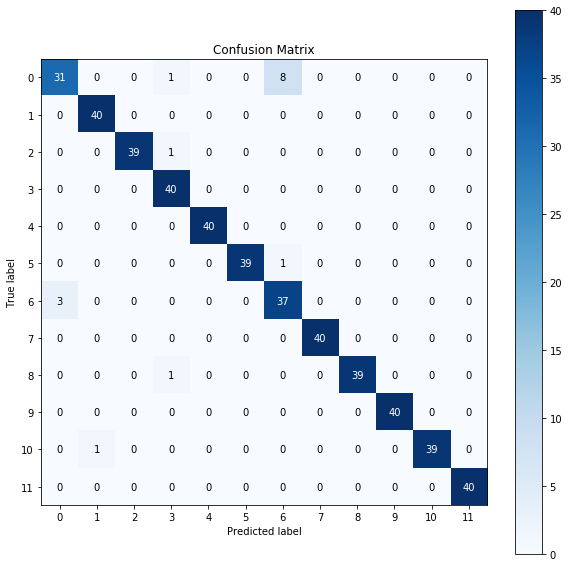

In [86]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_xception_val, lr_pred, normalize=False, figsize=(10, 10))
plt.show()

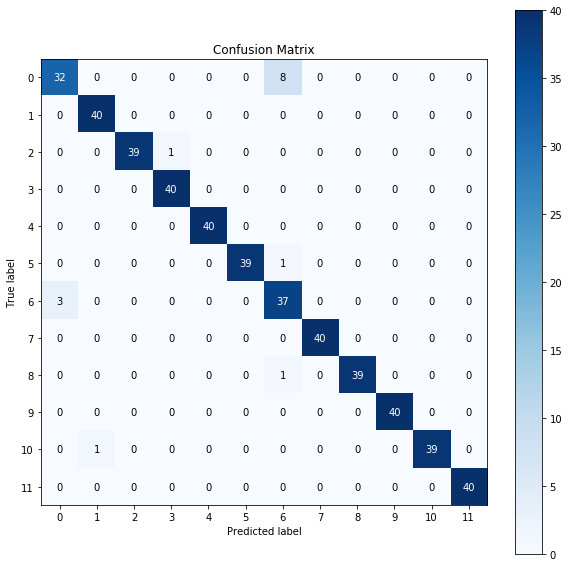

In [87]:

skplt.metrics.plot_confusion_matrix(y_xception_val, svc_pred, normalize=False, figsize=(10, 10))
plt.show()

In [30]:
def get_bottleneck_resnet(train_path, validate_path, test_path, dim, batch_size):
    train_generator = create_generator(train_path, dim, batch_size)
    validate_generator = create_generator(validate_path, dim, batch_size)
    test_generator = create_generator(test_path, dim, batch_size)

    base_model = ResNet50(input_shape=(dim, dim, 3), include_top=False, weights='imagenet', pooling='avg')
    x = base_model.output
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)    
    predictions = Dense(12, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
    model.load_weights(os.path.join('', 'weights_resnet.h5'))
    model.layers.pop()
    model.layers.pop()
    
    x_train = model.predict_generator(train_generator,verbose = 1,steps = 237)
    y_train = train_generator.classes
    
    x_val = model.predict_generator(validate_generator, verbose=1, steps = 30)
    y_val = validate_generator.classes
    
    x_test = model.predict_generator(test_generator, verbose=1, steps = 30)
    y_test = test_generator.classes

    return x_train, x_val, x_test, y_train, y_val, y_test 

In [33]:
x_resnet_train, x_resnet_val, x_resnet_test, y_resnet_train, y_resnet_val, y_resnet_test = \
    get_bottleneck_resnet(train_path, validate_path, test_path,dim, batch_size)

Found 3790 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
30/30 [==============================] - 11s    


In [34]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_resnet_train, y_resnet_train)
lr_pred_resnet = lr.predict(x_resnet_val)
accuracy_score(y_resnet_val, lr_pred_resnet)

0.9604166666666667

In [46]:
svc = SVC(kernel="linear", class_weight="balanced")
svc.fit(x_resnet_train, y_resnet_train)
svc_pred_resnet = svc.predict(x_resnet_val)
accuracy_score(y_resnet_val, svc_pred_resnet)

0.9604166666666667

In [47]:
xb = xgb.XGBClassifier()
xb.fit(x_xception_train, y_xception_train)

xb.score(x_xception_val,y_xception_val)

0.96458333333333335

In [41]:
def get_bottleneck_vgg16(train_path, validate_path, test_path, dim, batch_size):
    train_generator = create_generator(train_path, dim, batch_size)
    validate_generator = create_generator(validate_path, dim, batch_size)
    test_generator = create_generator(test_path, dim, batch_size)

    base_model = VGG16(input_shape=(dim, dim, 3), include_top=False, weights='imagenet', pooling='avg')
    x = base_model.output
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)    
    predictions = Dense(12, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
    model.load_weights(os.path.join('', 'weights_vgg16.h5'))
    model.layers.pop()
    model.layers.pop()
    
    x_train = model.predict_generator(train_generator,verbose = 1,steps = 237)
    y_train = train_generator.classes
    
    x_val = model.predict_generator(validate_generator, verbose=1, steps = 30)
    y_val = validate_generator.classes
    
    x_test = model.predict_generator(test_generator, verbose=1, steps = 30)
    y_test = test_generator.classes

    return x_train, x_val, x_test, y_train, y_val, y_test 

In [42]:
x_vgg16_train, x_vgg16_val, x_vgg16_test, y_vgg16_train, y_vgg16_val, y_vgg16_test = \
    get_bottleneck_vgg16(train_path, validate_path, test_path,dim, batch_size)

Found 3790 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
Found 480 images belonging to 12 classes.
30/30 [==============================] - 17s    


In [43]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_vgg16_train, y_vgg16_train)
lr_pred_vgg16 = lr.predict(x_vgg16_val)
accuracy_score(y_vgg16_val, lr_pred_vgg16)

0.95416666666666672

In [51]:
svc = SVC(kernel="linear", class_weight="balanced")
svc.fit(x_vgg16_train, y_vgg16_train)
svc_pred_vgg16 = svc.predict(x_vgg16_val)
accuracy_score(y_vgg16_val, svc_pred_vgg16)

0.94791666666666663

In [49]:
xb = xgb.XGBClassifier()
xb.fit(x_vgg16_train, y_vgg16_train)
xb.score(x_vgg16_val,y_vgg16_val)

0.94791666666666663

In [54]:
x_train = np.hstack([x_vgg16_train, x_xception_train, x_resnet_train])
x_validation = np.hstack([x_vgg16_val, x_xception_val, x_resnet_val])
x_test = np.hstack([x_vgg16_test, x_exception_test, x_resnet_test])

In [59]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_vgg16_train)
lr_pred_vgg16 = lr.predict(x_validation)
accuracy_score(y_vgg16_val, lr_pred_vgg16)


0.96250000000000002

In [60]:
svc = SVC(kernel="linear", class_weight="balanced")
svc.fit(x_train, y_vgg16_train)
svc_pred_vgg16 = svc.predict(x_validation)
accuracy_score(y_vgg16_val, svc_pred_vgg16)

0.96250000000000002

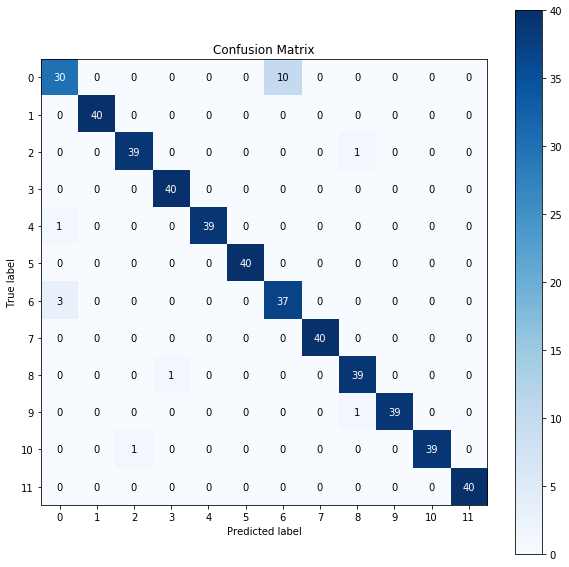

In [68]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_vgg16_val,lr_pred_vgg16, normalize=False, figsize=(10, 10))
plt.show()